In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle as pkl
import os
import sys
import time
import datetime
import tabulate
import random
from sklearn.mixture import GaussianMixture

In [2]:
#  the dataset is stored in the following format:
#  /MucaMoveDataset/*.txt

#  the dataset is stored in the following format:
# - each line represents a single frame
# - the frame represents a matrix 11x11
# - a sequence of frames represents a video
# - each sequence is separated by a ";"
# - each file represents a new label


[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 20.4375, 21.762500000000728, 13.299999999999272, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 13.225000000000364, 29.450000000000728, 29.637500000000728, 19.375, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.762500000000728, 26.9375, 25.299999999999272, 13.875, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.3125, 19.287500000000364, 15.725000000000364, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.850000000000364, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.237499999999272, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 20.4375, 21.762500000000728, 10.299999999999272, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 17.225000000000364, 28.450000000000728, 27.637500000000728, 19.375, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 17.762500000000728, 27.9375, 25.299999999999272, 13.875, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 15.3125, 25.287500000000364, 18.725000000000364, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 13.850000000000364, 11.262500000000728, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.237499999999272, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 20.4375, 21.762500000000728, 12.299999999999272, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 19.225000000000364, 28.450000000000728, 28.637500000000728, 21.375, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 19.762500000000728, 27.9375, 25.299999999999272, 14.875, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 17.3125, 26.287500000000364, 19.725000000000364, 10.049999999999272, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.362499999999272, 14.850000000000364, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 20.4375, 22.762500000000728, 11.299999999999272, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 18.225000000000364, 28.450000000000728, 28.637500000000728, 20.375, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 18.762500000000728, 27.9375, 25.299999999999272, 13.875, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 17.3125, 26.287500000000364, 21.725000000000364, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.362499999999272, 14.850000000000364, 10.262500000000728, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 21.4375, 23.762500000000728, 12.299999999999272, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 20.225000000000364, 29.450000000000728, 29.637500000000728, 20.375, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 20.762500000000728, 26.9375, 26.299999999999272, 13.875, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 20.3125, 27.287500000000364, 21.725000000000364, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.362499999999272, 15.850000000000364, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 20.4375, 22.762500000000728, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 21.225000000000364, 29.450000000000728, 29.637500000000728, 20.375, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 22.762500000000728, 27.9375, 26.299999999999272, 13.875, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 20.3125, 27.287500000000364, 21.725000000000364, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.362499999999272, 15.850000000000364, 12.262500000000728, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 20.4375, 22.762500000000728, 12.299999999999272, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 20.225000000000364, 30.450000000000728, 28.637500000000728, 21.375, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 22.762500000000728, 28.9375, 25.299999999999272, 16.875, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 22.3125, 26.287500000000364, 21.725000000000364, 10.049999999999272, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 13.362499999999272, 16.850000000000364, 11.262500000000728, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 20.4375, 21.762500000000728, 10.299999999999272, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 22.225000000000364, 29.450000000000728, 27.637500000000728, 20.375, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 23.762500000000728, 28.9375, 26.299999999999272, 13.875, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 23.3125, 27.287500000000364, 21.725000000000364, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 13.362499999999272, 17.850000000000364, 10.262500000000728, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.237499999999272, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.950000000000728, 20.4375, 20.762500000000728, 12.299999999999272, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 22.225000000000364, 30.450000000000728, 28.637500000000728, 20.375, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 21.762500000000728, 27.9375, 25.299999999999272, 13.875, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 20.3125, 27.287500000000364, 22.725000000000364, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 13.362499999999272, 15.850000000000364, 11.262500000000728, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 21.4375, 23.762500000000728, 12.299999999999272, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 20.225000000000364, 29.450000000000728, 29.637500000000728, 21.375, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 21.762500000000728, 28.9375, 26.299999999999272, 15.875, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 20.3125, 27.287500000000364, 22.725000000000364, 11.049999999999272, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.362499999999272, 15.850000000000364, 13.262500000000728, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 20.4375, 22.762500000000728, 12.299999999999272, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 19.225000000000364, 30.450000000000728, 28.637500000000728, 21.375, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 18.762500000000728, 28.9375, 26.299999999999272, 15.875, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 18.3125, 27.287500000000364, 21.725000000000364, 10.049999999999272, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.362499999999272, 16.850000000000364, 10.262500000000728, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 19.4375, 21.762500000000728, 10.299999999999272, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 17.225000000000364, 28.450000000000728, 27.637500000000728, 19.375, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 20.762500000000728, 27.9375, 26.299999999999272, 13.875, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 18.3125, 27.287500000000364, 22.725000000000364, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.362499999999272, 15.850000000000364, 10.262500000000728, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 18.4375, 21.762500000000728, 10.299999999999272, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 19.225000000000364, 28.450000000000728, 28.637500000000728, 17.375, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 21.762500000000728, 26.9375, 25.299999999999272, 12.875, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 20.3125, 26.287500000000364, 20.725000000000364, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 11.362499999999272, 15.850000000000364, 10.262500000000728, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 21.4375, 21.762500000000728, 10.299999999999272, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 19.225000000000364, 30.450000000000728, 29.637500000000728, 18.375, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 21.762500000000728, 27.9375, 26.299999999999272, 12.875, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 22.3125, 27.287500000000364, 22.725000000000364, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 13.362499999999272, 17.850000000000364, 11.262500000000728, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 17.4375, 20.762500000000728, 10.299999999999272, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 19.225000000000364, 28.450000000000728, 29.637500000000728, 19.375, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 21.762500000000728, 28.9375, 25.299999999999272, 13.875, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 21.3125, 27.287500000000364, 21.725000000000364, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 13.362499999999272, 16.850000000000364, 10.262500000000728, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 18.4375, 20.762500000000728, 11.299999999999272, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 17.225000000000364, 29.450000000000728, 27.637500000000728, 18.375, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 19.762500000000728, 25.9375, 25.299999999999272, 13.875, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 17.3125, 26.287500000000364, 20.725000000000364, 10.049999999999272, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 11.362499999999272, 14.850000000000364, 10.262500000000728, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.237499999999272, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 15.4375, 17.762500000000728, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.225000000000364, 26.450000000000728, 27.637500000000728, 14.375, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.762500000000728, 20.9375, 21.299999999999272, 11.875, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.287500000000364, 12.725000000000364, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

;
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 22.987499999999272, 27.287500000000364, 18.674999999999272, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.975000000000364, 21.450000000000728, 24.612499999999272, 14.4375, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 11.4375, 12.762500000000728, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 14.412500000000364, 21.350000000000364, 11.862499999999272, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 14.825000000000728, 25.987499999999272, 28.287500000000364, 18.674999999999272, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 17.975000000000364, 25.450000000000728, 26.612499999999272, 17.4375, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 17.950000000000728, 25.4375, 24.762500000000728, 12.299999999999272, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.225000000000364, 12.450000000000728, 11.637500000000728, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 15.412500000000364, 21.350000000000364, 11.862499999999272, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 14.825000000000728, 24.987499999999272, 28.287500000000364, 18.674999999999272, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 19.975000000000364, 27.450000000000728, 25.612499999999272, 17.4375, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 20.950000000000728, 27.4375, 23.762500000000728, 11.299999999999272, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.225000000000364, 16.450000000000728, 12.637500000000728, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 14.412500000000364, 19.350000000000364, 10.862499999999272, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 14.825000000000728, 26.987499999999272, 26.287500000000364, 16.674999999999272, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 19.975000000000364, 26.450000000000728, 25.612499999999272, 16.4375, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 20.950000000000728, 27.4375, 23.762500000000728, 10.299999999999272, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 13.225000000000364, 17.450000000000728, 12.637500000000728, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.237499999999272, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 17.412500000000364, 19.350000000000364, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 17.825000000000728, 24.987499999999272, 28.287500000000364, 19.674999999999272, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 11.399999999999636, 21.975000000000364, 26.450000000000728, 27.612499999999272, 18.4375, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.012500000000728, 23.950000000000728, 27.4375, 23.762500000000728, 13.299999999999272, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 15.225000000000364, 16.450000000000728, 12.637500000000728, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 15.412500000000364, 21.350000000000364, 11.862499999999272, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 17.825000000000728, 25.987499999999272, 28.287500000000364, 19.674999999999272, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 21.975000000000364, 25.450000000000728, 26.612499999999272, 16.4375, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.012500000000728, 23.950000000000728, 26.4375, 23.762500000000728, 12.299999999999272, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 15.225000000000364, 17.450000000000728, 12.637500000000728, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 14.412500000000364, 19.350000000000364, 10.862499999999272, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 16.825000000000728, 24.987499999999272, 27.287500000000364, 18.674999999999272, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 22.975000000000364, 25.450000000000728, 26.612499999999272, 17.4375, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 22.950000000000728, 24.4375, 24.762500000000728, 11.299999999999272, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 15.225000000000364, 15.450000000000728, 12.637500000000728, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 14.412500000000364, 18.350000000000364, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 16.825000000000728, 24.987499999999272, 27.287500000000364, 18.674999999999272, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 20.975000000000364, 25.450000000000728, 25.612499999999272, 16.4375, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 22.950000000000728, 25.4375, 23.762500000000728, 10.299999999999272, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 15.225000000000364, 17.450000000000728, 12.637500000000728, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 15.412500000000364, 18.350000000000364, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 15.825000000000728, 25.987499999999272, 27.287500000000364, 19.674999999999272, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 21.975000000000364, 25.450000000000728, 27.612499999999272, 19.4375, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 22.950000000000728, 25.4375, 24.762500000000728, 12.299999999999272, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 14.225000000000364, 16.450000000000728, 13.637500000000728, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 15.412500000000364, 20.350000000000364, 10.862499999999272, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 17.825000000000728, 24.987499999999272, 28.287500000000364, 19.674999999999272, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 21.975000000000364, 25.450000000000728, 27.612499999999272, 18.4375, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 23.950000000000728, 26.4375, 25.762500000000728, 12.299999999999272, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 15.225000000000364, 17.450000000000728, 12.637500000000728, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 15.412500000000364, 19.350000000000364, 10.862499999999272, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 16.825000000000728, 24.987499999999272, 26.287500000000364, 19.674999999999272, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.399999999999636, 20.975000000000364, 24.450000000000728, 26.612499999999272, 19.4375, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 11.012500000000728, 22.950000000000728, 27.4375, 24.762500000000728, 14.299999999999272, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 14.225000000000364, 16.450000000000728, 11.637500000000728, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 14.412500000000364, 19.350000000000364, 11.862499999999272, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 15.825000000000728, 24.987499999999272, 25.287500000000364, 17.674999999999272, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 20.975000000000364, 25.450000000000728, 24.612499999999272, 17.4375, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 21.950000000000728, git@github.com:electron260/MucaMoveDataset.git25.4375, 23.762500000000728, 11.299999999999272, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 13.225000000000364, 17.450000000000728, 11.637500000000728, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 15.412500000000364, 17.350000000000364, 10.862499999999272, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 16.825000000000728, 23.987499999999272, 27.287500000000364, 18.674999999999272, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 20.975000000000364, 26.450000000000728, 25.612499999999272, 17.4375, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 22.950000000000728, 26.4375, 23.762500000000728, 12.299999999999272, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 15.225000000000364, 17.450000000000728, 11.637500000000728, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 14.412500000000364, 18.350000000000364, 10.862499999999272, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 14.825000000000728, 25.987499999999272, 26.287500000000364, 18.674999999999272, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 20.975000000000364, 27.450000000000728, 24.612499999999272, 18.4375, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 20.950000000000728, 27.4375, 23.762500000000728, 10.299999999999272, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 14.225000000000364, 18.450000000000728, 10.637500000000728, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 14.412500000000364, 18.350000000000364, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 15.825000000000728, 26.987499999999272, 27.287500000000364, 18.674999999999272, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 20.975000000000364, 27.450000000000728, 25.612499999999272, 18.4375, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 20.950000000000728, 28.4375, 25.762500000000728, 12.299999999999272, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 13.225000000000364, 19.450000000000728, 12.637500000000728, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 16.412500000000364, 19.350000000000364, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 15.825000000000728, 25.987499999999272, 28.287500000000364, 18.674999999999272, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 20.975000000000364, 25.450000000000728, 27.612499999999272, 18.4375, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 20.950000000000728, 27.4375, 24.762500000000728, 12.299999999999272, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 14.225000000000364, 17.450000000000728, 13.637500000000728, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 14.412500000000364, 19.350000000000364, 11.862499999999272, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 13.825000000000728, 24.987499999999272, 27.287500000000364, 18.674999999999272, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 18.975000000000364, 26.450000000000728, 25.612499999999272, 17.4375, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 18.950000000000728, 26.4375, 23.762500000000728, 12.299999999999272, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.225000000000364, 16.450000000000728, 10.637500000000728, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 13.412500000000364, 19.350000000000364, 10.862499999999272, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 17.987499999999272, 27.287500000000364, 18.674999999999272, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 16.450000000000728, 23.612499999999272, 14.4375, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 11.4375, 12.762500000000728, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.412500000000364, 20.350000000000364, 12.862499999999272, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

;

In [3]:
PATH = "MucaMoveDataset/"
OUTPUT_PATH = "dataset/"

#  for each file in the dataset folder
#  read the file and create a new dataset file
# the dataset file will be s stored in the following format:
# - [label][index] = [sequence]

def create_dataset(path:str)->dict:
    """
    create a dataset from a path
    """
    # create a dictionary to store the dataset
    dataset = {}
    # for each file in the path
    for file in os.listdir(path):
        # create a file name from the column name
        if file.endswith(".txt"):
            if file.endswith(".txt"):
                # remove the file extension
                file = file.replace(".txt", "")
                # cut into sequences
                with open(path+file+".txt", "r") as f:
                    # read the file
                    content = f.readlines()
                    # split into sequences
                    frames =[]
                    dataset[file] = []
                    for l in content:
                        # remove the line break
                        l = l.replace("\n", "").replace("\r", "").replace(" ", "").replace(";", "").replace("[", "").replace("]", "")
                        temp=[]
                        if(len(l)>1):
                            # split into frames
                            l =l.split(",")
                            #convert to numpy array
                            try:
                                l = np.array(l).astype(np.float)
                            except ValueError:
                                print(l)
                            # add the sequence to the dataset
                            frames.append(l)
                        else:
                            dataset[file].append(np.array(frames))
                            frames = []
    return dataset

def remove_empty(dataset:dict)->dict:
    """
    remove empty sequences from a dataset
    """
    # for each column in the dataset
    for col in dataset:
        # get the column value
        value = dataset[col]
        # create a new list to store the sequences
        new_value = []
        # for each sequence in the column
        for sequence in value:
            # if the sequence is not empty
            if len(sequence) > 0:
                # add the sequence to the new list
                new_value.append(sequence)
        # update the column value
        dataset[col] = new_value
    return dataset

def save_dataset(dataset:dict, path:str, name:str = "")->None:
    """
    save a dataset to a path using pickle
    """
    if name == "":
        name = datetime.datetime.now().strftime("%Y-%m-%d-%H-%M-%S")
    file = path+name+".pkl"
    # save the column to the file
    with open(file, "wb") as f:
        pkl.dump(dataset, f)


def load_dataset(path:str)->dict:
    """
    load a dataset from a path
    """
    # load the dataset from the file
    with open(path, "rb") as f:
        return pkl.load(f)

def display_dataset(dataset:dict)->None:
    """
    display a dataset
    """
    # format 
    table = [["label", "sequences", "n frames", "matrix size"]]
    # for each column in the dataset
    for col in dataset:
        # get the column value
        value = dataset[col]
        # get the number of sequences
        n_sequences = len(value)
        # get the number of frames
        n_frames = len(value[0])
        # get the matrix size
        matrix_size = value[0][0].shape
        # add the column to the table
        table.append([col, n_sequences, n_frames, matrix_size])
    # display the table
    print(tabulate.tabulate(table, headers="firstrow", tablefmt="fancy_grid"))

def check_sequence_shape(dataset:dict):
    """
    check if all the sequences in a dataset have the same shape
    """
    # for each column in the dataset
    for col in dataset:
        # get the column value
        value = dataset[col]
        # get the first sequence shape
        shape = value[0][1].shape
        # for each sequence in the column
        for sequence in value:
            # for each frame in the sequence
            for frame in sequence:
                # if the shape is different
                if frame.shape != shape:
                    # return false
                    print(col, frame.shape, shape)
                    return False
        return True
    # return true

In [4]:

# create a dataset from the dataset folder

dataset = create_dataset(PATH)
# remove empty sequences
dataset = remove_empty(dataset)
# display the dataset
display_dataset(dataset)
# check if all the sequences have the same shape
print(check_sequence_shape(dataset))
# save the dataset to the output folder
save_dataset(dataset, OUTPUT_PATH, "dataset")

/tmp/ipykernel_17250/3523404387.py:38: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  l = np.array(l).astype(np.float)


╒════════════╤═════════════╤════════════╤═══════════════╕
│ label      │   sequences │   n frames │ matrix size   │
╞════════════╪═════════════╪════════════╪═══════════════╡
│ slidedown  │         115 │         15 │ (121,)        │
├────────────┼─────────────┼────────────┼───────────────┤
│ slideright │         201 │         13 │ (121,)        │
├────────────┼─────────────┼────────────┼───────────────┤
│ longtouch  │          89 │         21 │ (121,)        │
├────────────┼─────────────┼────────────┼───────────────┤
│ slideup    │         166 │         15 │ (121,)        │
├────────────┼─────────────┼────────────┼───────────────┤
│ slideleft  │         127 │          9 │ (121,)        │
╘════════════╧═════════════╧════════════╧═══════════════╛
True


In [5]:
#  load the dataset from the output folder
dataset2 = load_dataset(OUTPUT_PATH + "dataset.pkl")
# display the dataset
display_dataset(dataset2)

╒════════════╤═════════════╤════════════╤═══════════════╕
│ label      │   sequences │   n frames │ matrix size   │
╞════════════╪═════════════╪════════════╪═══════════════╡
│ slidedown  │         115 │         15 │ (121,)        │
├────────────┼─────────────┼────────────┼───────────────┤
│ slideright │         201 │         13 │ (121,)        │
├────────────┼─────────────┼────────────┼───────────────┤
│ longtouch  │          89 │         21 │ (121,)        │
├────────────┼─────────────┼────────────┼───────────────┤
│ slideup    │         166 │         15 │ (121,)        │
├────────────┼─────────────┼────────────┼───────────────┤
│ slideleft  │         127 │          9 │ (121,)        │
╘════════════╧═════════════╧════════════╧═══════════════╛


In [6]:
#  compute the mean and standard deviation of the dataset
#  the dataset is stored in the following format:
# - [label][index] = [sequence]

def compute_mean_std_min_max(dataset:dict)->dict:
    """
    compute the mean and standard deviation of the dataset
    """
    # create a dictionary to store the mean and std
    mean_std = {}
    # for each column in the dataset
    for col in dataset:
        # get the column value
        value = dataset[col]
        # get the number of sequences
        n_sequences = len(value)
        # get the number of frames
        n_frames = len(value[0])
        # get the matrix size
        matrix_size = value[0][0].shape
        # compute the mean and std
        mean = np.zeros(matrix_size)
        std = np.zeros(matrix_size)
        min_ = np.zeros(matrix_size)
        max_ = np.zeros(matrix_size)
        for seq in value:
            for frame in seq:
                try:
                    mean += frame
                    std += frame**2
                    min_ = np.minimum(min_, frame)
                    max_ = np.maximum(max_, frame)
                except:
                    print(frame)
        mean /= n_sequences*n_frames
        std /= n_sequences*n_frames
        std = np.sqrt(std - mean**2)
        min_ = np.minimum(min_, frame)
        max_ = np.maximum(max_, frame)
        # add the column to the table
        mean_std[col] = [mean, std, min_, max_]
    return mean_std

In [7]:

# compute the mean and std of the dataset
mean_std = compute_mean_std_min_max(dataset)
# display the mean and std
table = [["label", "mean", "std", "min", "max"]]

for col in mean_std:
    table.append([col, np.mean(mean_std[col][0]), np.mean(mean_std[col][1]), np.mean(mean_std[col][2]), np.mean(mean_std[col][3])])
meanmean = np.mean([np.mean(mean_std[col][0]) for col in mean_std])
meanstd = np.mean([np.mean(mean_std[col][1]) for col in mean_std])
meanmin = np.mean([np.mean(mean_std[col][2]) for col in mean_std])
meanmax = np.mean([np.mean(mean_std[col][3]) for col in mean_std])
table.append(["mean", meanmean, meanstd, meanmin, meanmax])
print(tabulate.tabulate(table, headers="firstrow", tablefmt="fancy_grid"))


╒════════════╤══════════╤═════════╤═══════╤═════════╕
│ label      │     mean │     std │   min │     max │
╞════════════╪══════════╪═════════╪═══════╪═════════╡
│ slidedown  │ 0.734967 │ 3.22796 │     0 │ 25.4237 │
├────────────┼──────────┼─────────┼───────┼─────────┤
│ slideright │ 0.827492 │ 3.53727 │     0 │ 26.6538 │
├────────────┼──────────┼─────────┼───────┼─────────┤
│ longtouch  │ 2.72862  │ 6.55935 │     0 │ 30.1428 │
├────────────┼──────────┼─────────┼───────┼─────────┤
│ slideup    │ 0.90408  │ 3.86393 │     0 │ 28.1885 │
├────────────┼──────────┼─────────┼───────┼─────────┤
│ slideleft  │ 1.74968  │ 5.29951 │     0 │ 32.3145 │
├────────────┼──────────┼─────────┼───────┼─────────┤
│ mean       │ 1.38897  │ 4.4976  │     0 │ 28.5446 │
╘════════════╧══════════╧═════════╧═══════╧═════════╛


In [8]:
#  choose a sequence at random and display it
label = random.choice(list(dataset.keys()))
sequence = random.choice(dataset[label])
print("label:", label)
#  build a gif from the sequence
import PIL
import imageio
images = []
print("there are a total of", len(sequence), "frames")
for frame in sequence:
    temp = np.reshape(frame, (11, 11))
    max_ = np.max(temp)
    if max_!=0:
        temp/=max_
    temp = PIL.Image.fromarray((temp*255).astype(np.uint8))
    # rescale the frame
    images.append(temp)
# save the gif
imageio.mimsave("GIFS/"+label+ ".gif", images)

# show the gif
from IPython.display import Image
Image("GIFS/"+label+ ".gif")


label: slidedown
there are a total of 10 frames


# analyze the data

In [9]:
# function that takes a dataset and function and apply the function to each sequence in the dataset
# and computes the variation across labels
def compute_variation(dataset:dict, func:callable)->dict:
    """
    compute the variation across labels
    """
    # create a dictionary to store the mean and std
    variation = {}
    # for each column in the dataset
    for col in dataset:
        # get the column value
        value = dataset[col]
        res=[]
        for seq in value:
            # compute the function
            res.append(func(seq))
        res = np.array(res)
        # print(res.shape, res)
        # use lambda function to seperate the array
        x=[]
        y=[]
        # print(res.shape, res)
        for i in range(res.shape[0]):
            x.append(res[i][0][0])
            y.append(res[i][0][1])
        # compute the mean and std
        xmean = np.mean(x)
        xstd = np.std(x)
        xmin_ = np.min(x)
        xmax_ = np.max(x)
        ymean = np.mean(y)
        ystd = np.std(y)
        ymin_ = np.min(y)
        ymax_ = np.max(y)
        # mean = np.mean(res)
        # std = np.std(res)
        # min_ = np.min(res)
        # max_ = np.max(res)
        # add the column to the table
        variation[col] = [xmean, xstd, xmin_, xmax_, ymean, ystd, ymin_, ymax_]
    return variation

# function to display the variation
def display_variation(variation:dict)->None:
    """
    display the variation
    """
    # format 
    table = [["label", "xmean", "xstd", "xmin", "xmax", "ymean", "ystd", "ymin", "ymax"]]
    # for each column in the dataset
    for col in variation:
        # get the column value
        value = variation[col]
        # add the column to the table
        table.append([col, value[0], value[1], value[2], value[3], value[4], value[5], value[6], value[7]])
    # display the table
    print(tabulate.tabulate(table, headers="firstrow", tablefmt="fancy_grid"))

In [10]:
#  analyse the dataset

#  load the dataset
dataset = load_dataset(OUTPUT_PATH + "dataset.pkl")

def get_max(frame, n:int)->int:
    """
    get the coordinates of the n max values in the frame
    """
    maxxes=[]
    temp = frame.copy()
    # temp = np.reshape(temp, (11, 11))
    for i in range(n):
        # get the index of the max value
        index = np.argmax(temp)
        # get the coordinates of the max value
        coordinates = (index//11, index%11)
        # add the coordinates to the list
        maxxes.append(coordinates)
        # remove the max value
        temp[index] = 0
    return maxxes

def get_center(frame)->tuple:
    """
    get the coordinates of the center of the touch 
    """
    temp = np.reshape(frame.copy(), (11, 11))
    # computer center of mass
    x = np.sum(temp*np.arange(11))/np.sum(temp)
    y = np.sum(temp*np.arange(11).reshape(-1, 1))/np.sum(temp)
    return (x, y)



def derivative_of_coordinates(coordinates:list)->list:
    """
    compute the derivative of the coordinates
    """
    # compute the derivative of the coordinates
    derivative = []
    for i in range(len(coordinates)-1):
        derivative.append((coordinates[i+1][0]-coordinates[i][0], coordinates[i+1][1]-coordinates[i][1]))
    # if the derivative is empty
    if len(derivative)==0:
        # return the last value
        return [coordinates[-1]]
    # if the derivative is not empty
    else:
        # return the derivative
        return derivative
    
def compute_seq(sequence:list)->list:
    """
    analyse a sequence
    """
    #  for each frame in the sequence
    max_values = []
    for frame in sequence[2:4]:
        # get the coordinates of the max values
        temp = get_max(frame, 1)[0]
        # temp = get_center(frame)
        # print(temp)
        max_values.append(temp)
    # max_values.append(get_max(sequence[0], 1)[0])
    # max_values.append(get_max(sequence[-1], 1)[0])
    # check types of maxxes
    # get the derivative of the max values
    derivative = derivative_of_coordinates(max_values)
    # return the derivative
    return derivative

In [11]:
#  compute the variation of the dataset
variation = compute_variation(dataset, compute_seq)
#  display the variation
display_variation(variation)

╒════════════╤════════════╤══════════╤════════╤════════╤════════════╤══════════╤════════╤════════╕
│ label      │      xmean │     xstd │   xmin │   xmax │      ymean │     ystd │   ymin │   ymax │
╞════════════╪════════════╪══════════╪════════╪════════╪════════════╪══════════╪════════╪════════╡
│ slidedown  │  0.0869565 │ 0.44848  │     -1 │      1 │ -1.4087    │ 0.631019 │     -4 │      0 │
├────────────┼────────────┼──────────┼────────┼────────┼────────────┼──────────┼────────┼────────┤
│ slideright │  0.935323  │ 1.68718  │    -10 │      3 │  0.0149254 │ 1.07193  │     -9 │      2 │
├────────────┼────────────┼──────────┼────────┼────────┼────────────┼──────────┼────────┼────────┤
│ longtouch  │  0.11236   │ 0.528687 │     -1 │      2 │ -0.168539  │ 0.479606 │     -2 │      1 │
├────────────┼────────────┼──────────┼────────┼────────┼────────────┼──────────┼────────┼────────┤
│ slideup    │  0.325301  │ 0.932782 │     -6 │      3 │  1.01205   │ 1.66099  │    -10 │      3 │
├─────────

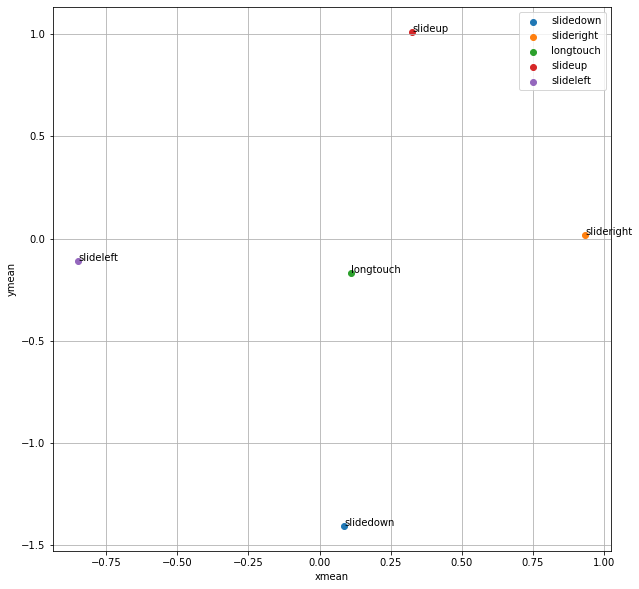

In [12]:
#  create a dict <xmean, ymean> -> label
thedict = {}

for col in variation:
    thedict[(variation[col][0], variation[col][4])] = col

#  plot the variation
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
for col in variation:
    plt.scatter(variation[col][0], variation[col][4], label=col)
    plt.annotate(col, (variation[col][0], variation[col][4]))
plt.xlabel("xmean")
plt.ylabel("ymean")
plt.grid()
plt.legend()
plt.show()

In [13]:
#  use nearest neighbour to predict the label of each sequence and compute accuracy
def predict_label(sequence:list, thedict:dict)->str:
    """
    predict the label of a sequence
    """
    # compute the derivative of the sequence
    derivative = compute_seq(sequence)
    # compute the mean of the derivative
    xmean = np.mean([i[0] for i in derivative])
    ymean = np.mean([i[1] for i in derivative])
    # compute the distance between the derivative and the dict
    distances = []
    for key in thedict:
        distances.append(((key[0]-xmean)**2+(key[1]-ymean)**2, thedict[key]))
    # get the minimum distance
    min_ = min(distances)
    # return the label
    return min_[1]

#  compute the accuracy
def compute_accuracy(dataset:dict, thedict:dict)->float:
    """
    compute the accuracy per class
    """
    # create a dictionary to store the accuracy
    accuracy = {}
    # for each column in the dataset
    for col in dataset:
        # get the column value
        value = dataset[col]
        # create a list to store the accuracy
        acc = []
        # for each sequence in the column
        for seq in value:
            # predict the label
            pred = predict_label(seq, thedict)
            # compute the accuracy
            acc.append(pred==col)
        # compute the accuracy
        acc = np.mean(acc)
        # add the accuracy to the dictionary
        accuracy[col] = acc
    # return the accuracy
    return accuracy


In [14]:
# compute the accuracy
accuracy = compute_accuracy(dataset, thedict)
# display the accuracy
print("accuracy: ", accuracy)
# display the accuracy per class in tabular form
table = [["label", "accuracy"]]
for col in accuracy:
    table.append([col, accuracy[col]])
print(tabulate.tabulate(table, headers="firstrow", tablefmt="fancy_grid"))


accuracy:  {'slidedown': 0.9217391304347826, 'slideright': 0.7114427860696517, 'longtouch': 0.6741573033707865, 'slideup': 0.8192771084337349, 'slideleft': 0.7244094488188977}
╒════════════╤════════════╕
│ label      │   accuracy │
╞════════════╪════════════╡
│ slidedown  │   0.921739 │
├────────────┼────────────┤
│ slideright │   0.711443 │
├────────────┼────────────┤
│ longtouch  │   0.674157 │
├────────────┼────────────┤
│ slideup    │   0.819277 │
├────────────┼────────────┤
│ slideleft  │   0.724409 │
╘════════════╧════════════╛
